# Question 3
### 3. What is the association between fruit and vegetable consumption and hypertension awareness among adults in the US?

First we will do a simple EDA to visualize the differences through groups. Then then we will like to see if there is statistical evidence that fruit and vegetable consumption is related to the awareness of hypertension. We will perform a t-student test to compare if the averages are different.

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats

In [34]:
data = pd.read_csv("final_sample.csv")

There are 2 variables related to Hypertension in our Dataset
* bphigh4: Ever Told Blood Pressure High
* bpmeds: Currently Taking Blood Pressure Medication

In [36]:
hypertension_variables = ["bphigh4", "bpmeds"]

And we have 6 variables related to vegetables and fruit consumption
+ fruitju1: How Many Times Did You Drink 100 Percent Pure Fruit Juices?
+ fruit1: How Many Times Did You Eat Fruit?
+ fvbeans: How Many Times Did You Eat Beans Or Lentils?
+ fvgreen: How Many Times Did You Eat Dark Green Vegetables?
+ fvorang: How Many Times Did You Eat Orange-Colored Vegetables?
+ vegetab1: How Many Times Did You Eat Other Vegetables?

In [37]:
frvg_variables = ["fruitju1", "fruit1", "fvbeans", "fvgreen", "fvorang", "vegetab1"]

## **EDA**

bphigh4
No                                            9721
Yes                                           7895
Told borderline or pre-hypertensive            227
Yes, but female told only during pregnancy     111
unknown                                         46
Name: count, dtype: int64


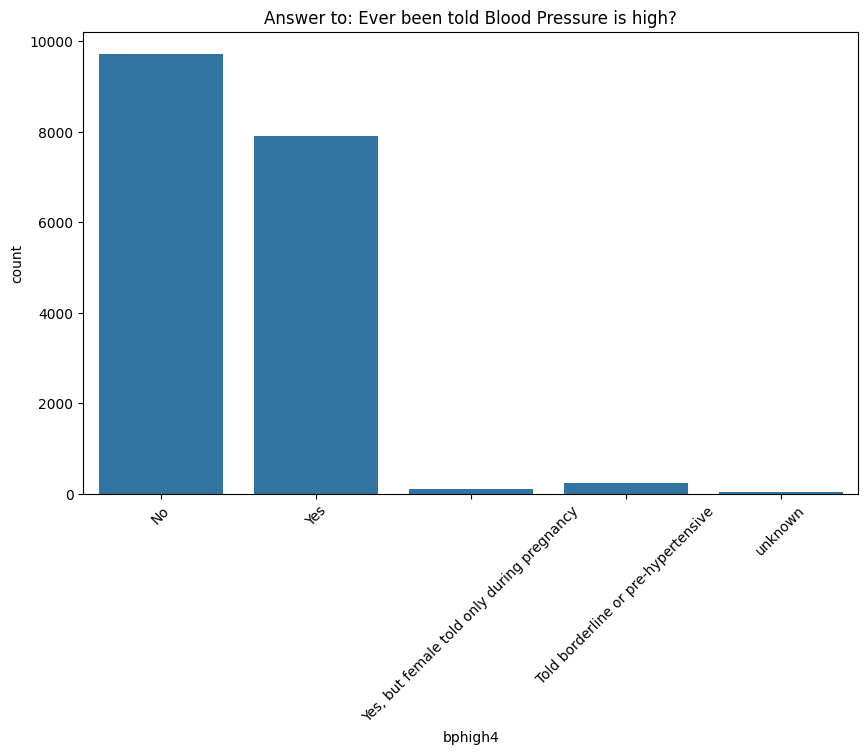

bpmeds
unknown    10108
Yes         6636
No          1256
Name: count, dtype: int64


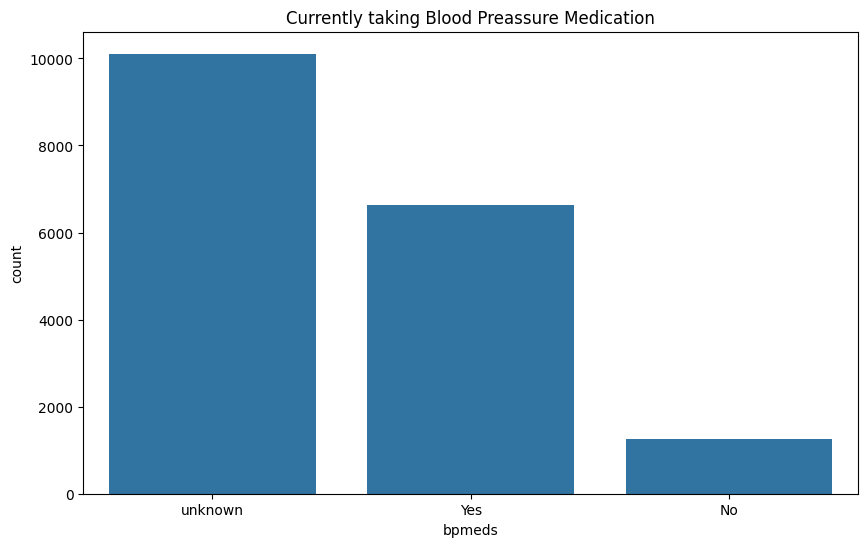

In [38]:
exercise_summary = data["bphigh4"].value_counts()
print(exercise_summary)

# Plot distribution of categories
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x="bphigh4")
plt.title(f"Answer to: Ever been told Blood Pressure is high?")
plt.xticks(rotation=45)
plt.show()

exercise_summary = data["bpmeds"].value_counts()
print(exercise_summary)

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x="bpmeds")
plt.title(f"Currently taking Blood Preassure Medication")
plt.show()

In this case we will use the first variable of the hypertension group to determine if differences arise when comparing different fruit consumptions.
We have not chosen the second variable due to the vast amount of NAs. 

In [39]:
exercise_summary = data["fruit1"].value_counts()
print(exercise_summary)
print(np.unique(data["fruit1"]))

fruit1
101.0    4329
102.0    2162
203.0    1124
202.0     898
103.0     874
         ... 
216.0       1
109.0       1
209.0       1
336.0       1
112.0       1
Name: count, Length: 73, dtype: int64
[  0.         101.         102.         103.         104.
 105.         106.         107.         108.         109.
 112.         115.         130.         178.78952391 201.
 202.         203.         204.         205.         206.
 207.         208.         209.         210.         212.
 214.         215.         216.         220.         230.
 234.         300.         301.         302.         303.
 304.         305.         306.         307.         308.
 309.         310.         311.         312.         313.
 314.         315.         316.         317.         318.
 319.         320.         321.         322.         323.
 324.         325.         326.         327.         328.
 329.         330.         331.         335.         336.
 340.         345.         350.         360.   

Here we observe an unsual distribution of a consumption variable. Below we will show a brief explanation and the procedure that we will follow to transform the data for our purpose.

The Categories meaning can be understand through the following schema:

        1 _ _ Per day

        2 _ _ Per week
        
        3 _ _ Per month
        
        5 5 5 Never
        
        7 7 7 Don’t know / Not sure
        
        9 9 9 Refused



In our dataset there are no (555, 777, 999) groups. Although, we find a 0.0 group that we will classify as (Never) taking into account that groups (100, 200, 300) are not represented in our data either.

We will pass all the data to a monthly bases for that we assume that the respondant's consumption is constant or at least representative of the average consumption through time. 

In [40]:
def convert_var_to_monthly(x):
    freq_map = {1: 30, 2: 4, 3: 1, 0: 0}  # daily, weekly, monthly, never
    freq = int(x // 100)  # extract frequency (1st digit)
    amount = int(x % 100)  # extract amount (last 2 digits)
    monthly_amount = amount * freq_map[freq]
    return monthly_amount


data["fruit1_monthly"] = data["fruit1"].apply(convert_var_to_monthly)

In [41]:
monthly_variables = []
for frvg_cat in frvg_variables:
    month_var = frvg_cat + "_monthly"
    data[month_var] = data[frvg_cat].apply(convert_var_to_monthly)
    monthly_variables.append(month_var)

fruitju1_monthly
0      6815
30     3062
4      1073
8       814
2       801
12      781
1       555
3       523
60      499
5       489
20      472
10      400
960     341
16      303
15      284
90      158
6       145
28      108
7        90
25       89
120      40
24       40
14       20
40       18
150      15
18        7
210       6
17        6
9         5
32        5
21        5
48        4
56        2
27        2
80        2
22        2
26        2
23        2
31        1
100       1
35        1
360       1
11        1
99        1
180       1
240       1
36        1
45        1
84        1
300       1
810       1
29        1
33        1
Name: count, dtype: int64


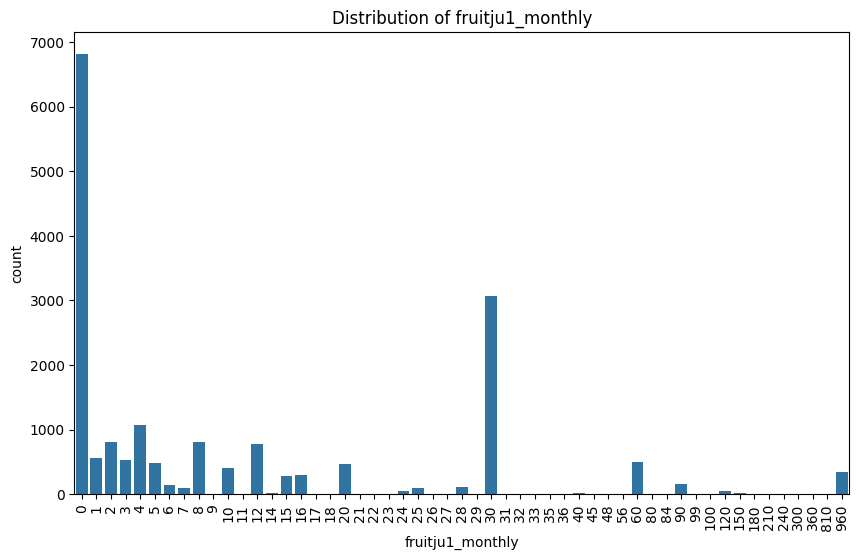

fruit1_monthly
30      4910
60      2196
20      1250
12      1219
8        985
90       882
4        846
0        765
15       666
16       621
10       562
5        444
2        387
3        340
25       315
1        232
2340     227
28       211
120      198
6        142
24       123
7         91
150       88
40        46
14        46
180       23
18        18
45        17
32        15
210       14
21        14
9         11
22         9
48         8
31         8
50         7
35         7
80         6
27         6
17         6
26         6
13         4
240        4
11         3
56         3
29         3
900        2
36         2
19         2
99         2
23         2
270        1
450        1
64         1
75         1
136        1
360        1
Name: count, dtype: int64


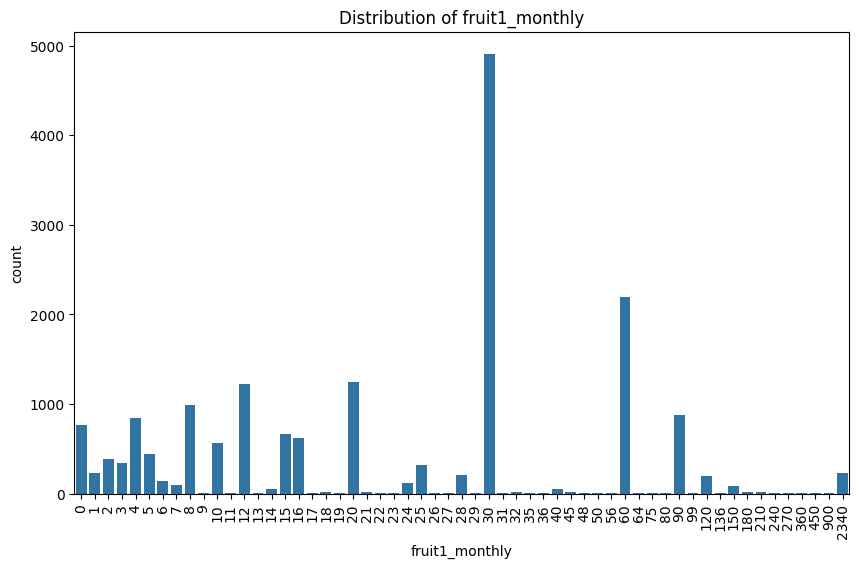

fvbeans_monthly
0      3130
4      2621
8      1954
2      1418
12     1347
5      1004
3       973
1       939
10      892
30      800
20      573
15      539
16      468
6       338
32      322
7       214
60      141
25       69
28       44
24       39
14       34
90       28
9        18
18       12
150      12
120      12
21       10
40        9
11        6
17        5
13        3
50        3
35        3
23        2
45        2
22        2
27        2
210       2
99        1
750       1
56        1
180       1
48        1
55        1
80        1
100       1
240       1
29        1
Name: count, dtype: int64


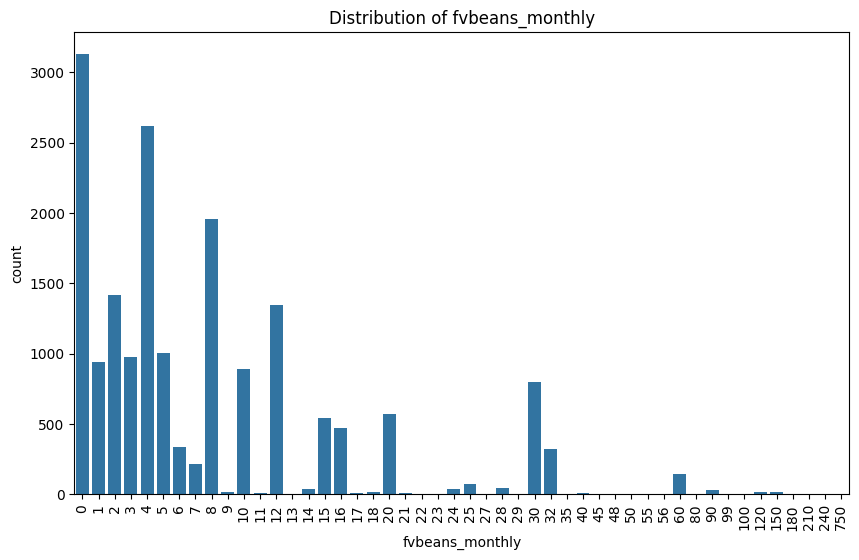

fvgreen_monthly
30     2622
12     1812
8      1722
4      1616
0      1595
20     1445
16      906
15      818
10      817
5       687
2       647
60      620
3       539
1       405
25      328
6       266
32      203
24      194
7       167
28      155
90      125
14       50
120      35
18       29
40       25
150      21
21       17
22       15
27       13
11       13
9        10
45        9
13        8
29        7
23        6
31        6
26        6
48        5
50        4
17        4
35        4
99        4
180       4
210       3
112       2
33        2
80        1
44        1
55        1
19        1
75        1
92        1
132       1
450       1
36        1
Name: count, dtype: int64


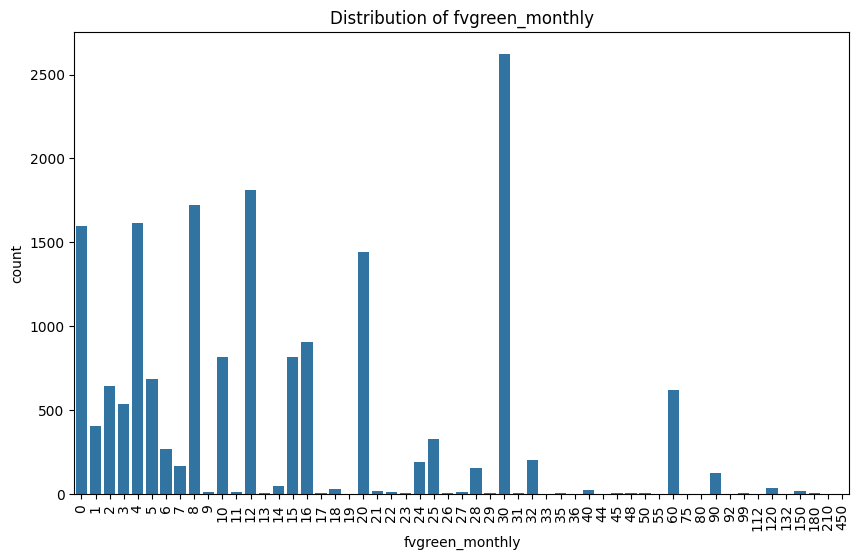

fvorang_monthly
0      2835
4      2750
8      1856
2      1456
12     1281
5      1092
1      1050
30     1020
10      943
3       893
15      586
20      575
16      497
6       329
44      199
7       196
60      127
25       67
28       44
24       40
90       39
14       27
9        13
40       12
120      12
18       10
150       9
21        6
32        5
22        5
13        5
17        5
23        3
11        2
19        2
50        1
92        1
36        1
180       1
45        1
750       1
88        1
68        1
300       1
Name: count, dtype: int64


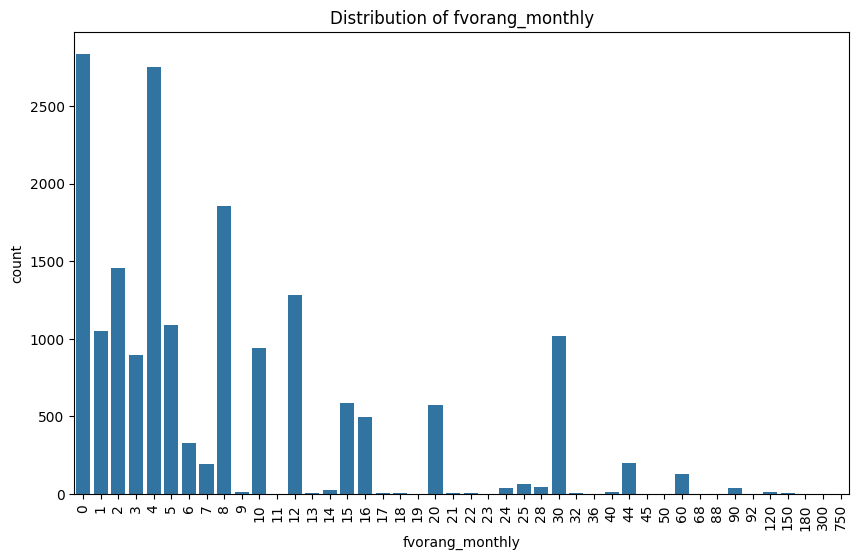

vegetab1_monthly
30     5159
20     1836
12     1768
60     1371
8      1269
       ... 
70        1
52        1
38        1
750       1
64        1
Name: count, Length: 63, dtype: int64


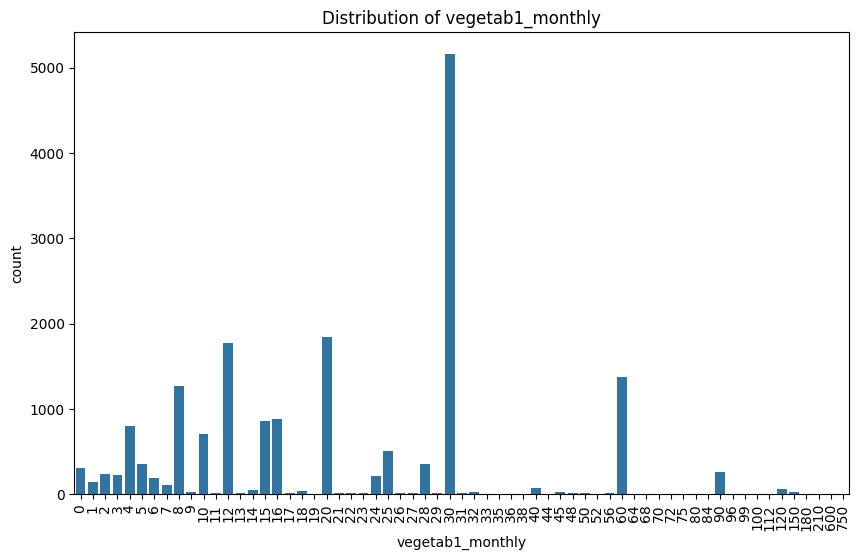

In [42]:
for frvg_cat in monthly_variables:
    exercise_summary = data[frvg_cat].value_counts()
    print(exercise_summary)

    # Plot distribution of categories
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=frvg_cat)
    plt.title(f"Distribution of {frvg_cat}")
    plt.xticks(rotation=90)
    plt.show()

## **Correlation**

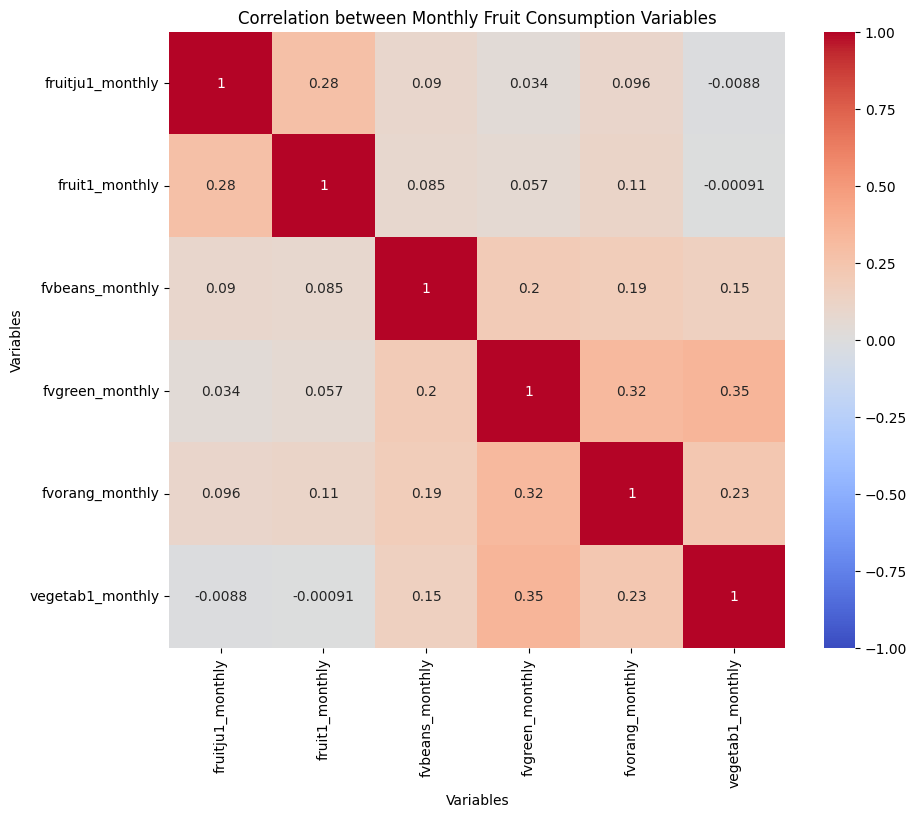

In [43]:
corr_matrix = data[monthly_variables].corr()

# create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, square=True)
plt.title("Correlation between Monthly Fruit Consumption Variables")
plt.xlabel("Variables")
plt.ylabel("Variables")
plt.show()

The correlation between the different fruit and vegetable consumptions variables is always positve. Being 0.31 The higher correlation value between two variables.

We are going to join the 6 variables in 3 groups (Fruits, Beans, Vegetables) by summing them.

In [44]:
frvg_final_set = ["fruit_consumption", "bean_consumption", "vegetable_consumption"]

data["fruit_consumption"] = data["fruitju1_monthly"] + data["fruit1_monthly"]
data["bean_consumption"] = data["fvbeans_monthly"]
data["vegetable_consumption"] = (
    data["fvgreen_monthly"] + data["fvorang_monthly"] + data["vegetab1_monthly"]
)

fruit_consumption
60      2070
30      1933
90       953
20       720
12       645
        ... 
2345       1
200        1
961        1
183        1
912        1
Name: count, Length: 197, dtype: int64


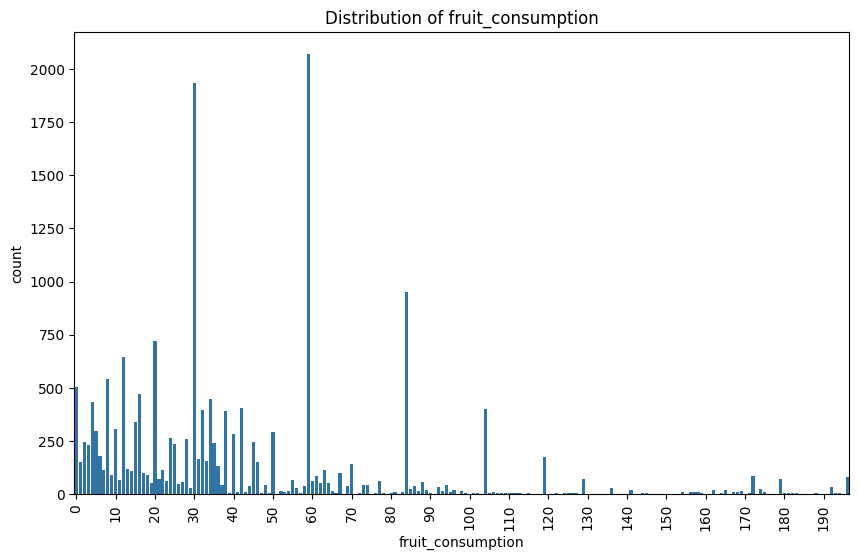

bean_consumption
0      3130
4      2621
8      1954
2      1418
12     1347
5      1004
3       973
1       939
10      892
30      800
20      573
15      539
16      468
6       338
32      322
7       214
60      141
25       69
28       44
24       39
14       34
90       28
9        18
18       12
150      12
120      12
21       10
40        9
11        6
17        5
13        3
50        3
35        3
23        2
45        2
22        2
27        2
210       2
99        1
750       1
56        1
180       1
48        1
55        1
80        1
100       1
240       1
29        1
Name: count, dtype: int64


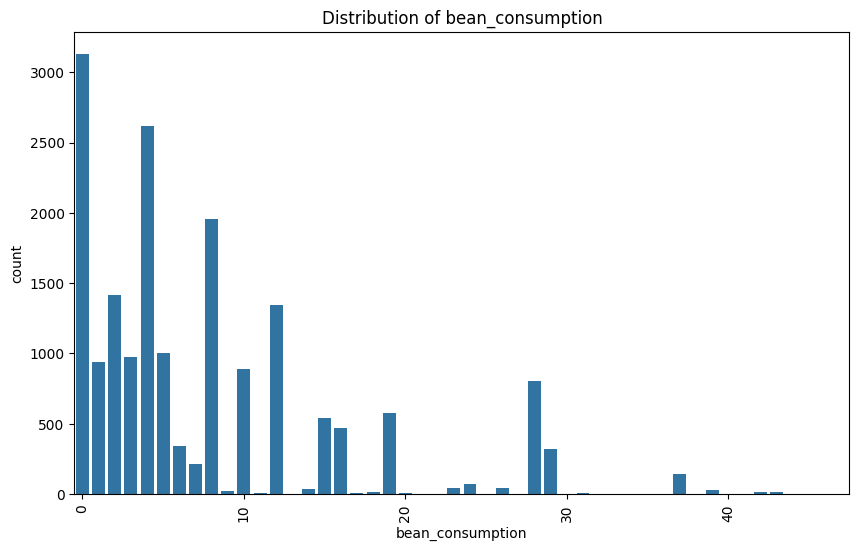

vegetable_consumption
40     617
50     562
32     505
20     495
36     479
      ... 
232      1
142      1
137      1
272      1
224      1
Name: count, Length: 203, dtype: int64


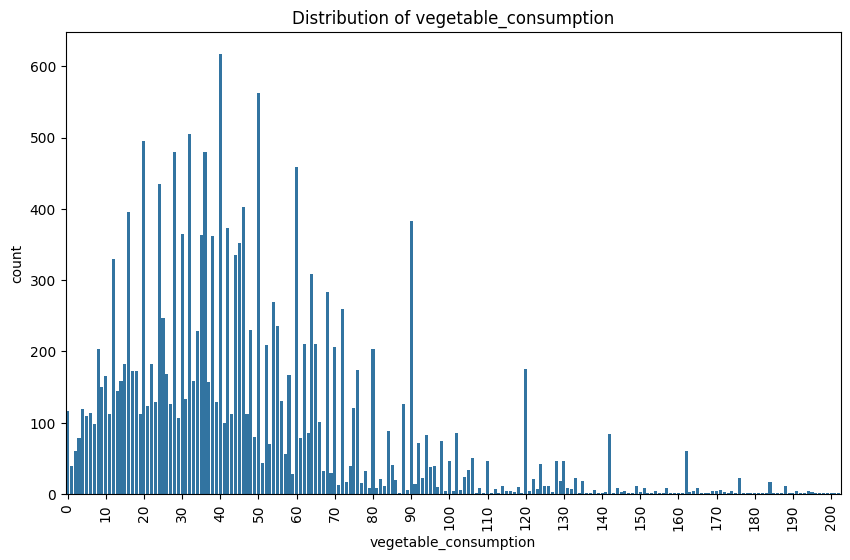

In [45]:
for frvg_cat in frvg_final_set:
    exercise_summary = data[frvg_cat].value_counts()
    print(exercise_summary)

    # Plot distribution of categories
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=frvg_cat)
    plt.title(f"Distribution of {frvg_cat}")

    plt.xticks(rotation=90)
    # Show only every 10th label on the x-axis
    xticks = plt.gca().get_xticks()
    plt.gca().set_xticks(xticks[::10])
    plt.gca().set_xticklabels(xticks[::10])

    plt.show()

Now for each variable we will create a 3 subgroups (Low: No or little consumption, Medium, High)

In [46]:
data["fruit_consumption_cat"] = pd.cut(
    data["fruit_consumption"],
    bins=[-np.inf, 29, 59, np.inf],
    labels=["low", "medium", "high"],
)
data["fruit_consumption_cat"].value_counts()
# Low -> Consumes fruit less than once a day
# Medium -> Consumes fruit less than twice a week

fruit_consumption_cat
low       6932
medium    5569
high      5499
Name: count, dtype: int64

In [47]:
data["bean_consumption_cat"] = pd.cut(
    data["bean_consumption"], bins=[-np.inf, 3, np.inf], labels=["low", "others"]
)
data["bean_consumption_cat"].value_counts()
# Low -> consumes beans less than once a week

bean_consumption_cat
others    11540
low        6460
Name: count, dtype: int64

In [48]:
data["vegetable_consumption_cat"] = pd.cut(
    data["vegetable_consumption"],
    bins=[-np.inf, 29, 59, np.inf],
    labels=["low", "medium", "high"],
)
data["vegetable_consumption_cat"].value_counts()
# Low -> Consumes fruit less than once a day
# Medium -> Consumes fruit less than twice a week

vegetable_consumption_cat
medium    7366
low       5522
high      5112
Name: count, dtype: int64

## **Fruit Consumption**

Compute Averages

In [49]:
data_fruit_experiment = data[["fruit_consumption_cat", "bphigh4"]].copy()

data_fruit_experiment.head()

,fruit_consumption_cat,bphigh4
0,high,No
1,medium,No
2,low,Yes
3,low,No
4,low,Yes


In [50]:
data_fruit_experiment["high_blood_pressure"] = [
    0 if s == "No" else 1 for s in data_fruit_experiment["bphigh4"]
]
data_fruit_experiment = data_fruit_experiment.drop("bphigh4", axis=1)
data_fruit_experiment

,fruit_consumption_cat,high_blood_pressure
0,high,0
1,medium,0
2,low,1
3,low,0
4,low,1
...,...,...
17995,low,0
17996,high,0
17997,medium,0
17998,low,1


In [51]:
col_counts = data["fruit_consumption_cat"].value_counts()
col_counts

fruit_consumption_cat
low       6932
medium    5569
high      5499
Name: count, dtype: int64

### Populations

In [53]:
result = data_fruit_experiment.groupby(
    by=["fruit_consumption_cat"], observed=True
).sum()
result["high_blood_pressure"] = result["high_blood_pressure"] / col_counts
result

,high_blood_pressure
fruit_consumption_cat,
low,0.468552
medium,0.457353
high,0.451718


CI - 95%

In [54]:
# We will get a 95% interval for each group population
# CI(95%) = z * SEp
# SEp = sqrt(p*(1-p)/n)
z = 1.96
sep_bp = []
populations = result["high_blood_pressure"].values
population_sizes = col_counts.values


for i in range(len(populations)):
    population = populations[i]
    n = population_sizes[i]
    sep_bp.append(np.sqrt(population * (1 - population) / n))

result["sep"] = sep_bp

In [55]:
result["min"] = result["high_blood_pressure"] - z * result["sep"]
result["max"] = result["high_blood_pressure"] + z * result["sep"]
result

,high_blood_pressure,sep,min,max
fruit_consumption_cat,,,,
low,0.468552,0.005993,0.456804,0.480299
medium,0.457353,0.006676,0.444269,0.470438
high,0.451718,0.006711,0.438565,0.464872


Following this approach we can't say that there is a relation with 95% confidence.

Although this approach has a clear bias and that is the selection of groups by fruit consumption. 

In [56]:
hypertension_fruit_experiment = data[["bphigh4", "fruit_consumption"]].copy()
result = (
    hypertension_fruit_experiment.groupby(by=["bphigh4"])
    .agg(["mean", "std"])
    .rename(columns={"mean": "mean_value", "std": "std_dev"})
    .iloc[[0, 2]]
)
print(data["bphigh4"].value_counts())
result

bphigh4
No                                            9721
Yes                                           7895
Told borderline or pre-hypertensive            227
Yes, but female told only during pregnancy     111
unknown                                         46
Name: count, dtype: int64


fruit_consumption            
               mean_value     std_dev
bphigh4                              
No              81.320955  292.923148
Yes             94.013680  347.584062

### Complementary Study


Let's test if the mean consumption of fruit of the people that have been told to have high blood pressure is not the same as those who have not been told. 

𝑥h − 𝑥nh ~ 𝑁 (𝜇h − 𝜇nh, 𝑆𝐸)

h -> have been toldhigh blood pressure.

nh -> not have been told.

In [57]:
mean_no = result.values[1][0]
mean_yes = result.values[0][0]

diff = mean_no - mean_yes
diff

12.692724909718322

In [58]:
n_no = data["bphigh4"].value_counts().iloc[0]
sd_no = result.values[0][1]

n_yes = data["bphigh4"].value_counts().iloc[1]
sd_yes = result.values[1][1]


se = np.sqrt(sd_no * sd_no / n_no + sd_yes * sd_yes / n_yes)
se

4.912162824309507

If they were the same we will have:

N(0, 5.11)

In [59]:
z_score = diff / se
z_score

2.583938147755213

𝑃(𝑧 > 𝑥)

In [60]:
alpha = 0.05
p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))  # Two-tailed test

# Results
print("Z-score:", z_score)
print("P-value:", p_value)

if p_value < alpha:
    print(
        "Reject the null hypothesis. The sample mean is significantly different from the population mean."
    )
else:
    print(
        "Fail to reject the null hypothesis. There is no significant difference between the sample mean and the population mean."
    )

Z-score: 2.583938147755213
P-value: 0.00976793099890605
Reject the null hypothesis. The sample mean is significantly different from the population mean.


The p-value is smaller than .05 and thus we reject the null hypothesis. We have enough evidence to declare that the means aren't different.

### Complementary study to the Complementary Study

We have enough samples to apply the Central Limit Theorem (CLT). However, our general Exploratory Data Analysis (EDA) and the analysis for this specific question revealed outliers. These outliers can be unreasonable for the measure we're using, like the data point of 4,000 hours of sleep. While this outlier doesn't affect all samples, it raises concerns about the data collection process.

Given that the variance might not be reliable due to these extreme errors, we propose a new approach below.

Are the mean consumption of fruit the same for T-student groups?

Point estimate $\pm$ Margin of Error

$(x_1 - x_2) \pm t_{df} * SE_{(x_1 - x_2)}$

In [61]:
t_df = 1.660  # More of 100 degrees of freedom with 95 % confidence
min_ci = diff - t_df * se
max_ci = diff + t_df * se
print(f"The CI 95% confidence is ({min_ci}, {max_ci})")

The CI 95% confidence is (4.5385346213645406, 20.846915198072104)


In [62]:
# CI 90% confidence
t_df = 1.290
min_ci = diff - t_df * se
max_ci = diff + t_df * se
print(f"The CI 90% confidence is ({min_ci}, {max_ci})")

The CI 90% confidence is (6.356034866359058, 19.029414953077588)


Dispite what we usually see we have higher confidence t-student that with the normal distribution. The t-student does not depend on the variance.

Here we could say both means are different with a 90% confidence. However, following the general significance of 95% and due to the differences in both distributions we will not accept the alternative hypothesis.

We will state that the fruit consumption is the same for those who have been told that their blood pressure is high and those who have not. 

## **Vegetable Consumption**

In [63]:
data_vegetable_experiment = data[["vegetable_consumption_cat", "bphigh4"]].copy()
data_vegetable_experiment["high_blood_pressure"] = [
    0 if s == "No" else 1 for s in data_vegetable_experiment["bphigh4"]
]
data_vegetable_experiment = data_vegetable_experiment.drop("bphigh4", axis=1)

In [64]:
col_counts = data["vegetable_consumption_cat"].value_counts()
result = data_vegetable_experiment.groupby(
    by=["vegetable_consumption_cat"], observed=True
).sum()
result["high_blood_pressure"] = result["high_blood_pressure"] / col_counts

# We will get a 95% interval for each group population
# CI(95%) = z * SEp
# SEp = sqrt(p*(1-p)/n)
z = 1.96
sep_bp = []
populations = result["high_blood_pressure"].values
population_sizes = col_counts.values


for i in range(len(populations)):
    population = populations[i]
    n = population_sizes[i]
    sep_bp.append(np.sqrt(population * (1 - population) / n))

result["sep"] = sep_bp

result["min"] = result["high_blood_pressure"] - z * result["sep"]
result["max"] = result["high_blood_pressure"] + z * result["sep"]
result

,high_blood_pressure,sep,min,max
vegetable_consumption_cat,,,,
low,0.475190,0.005819,0.463786,0.486595
medium,0.460494,0.006708,0.447347,0.473641
high,0.442684,0.006947,0.429068,0.456300


Here we see that the last interval is different from the other two with a confidence of 95%.

This means that for our dataset the mean of people that have been warned about high blood pressure is lower for people that eat 2 or more vegetables a day than those who eat less. 

In [65]:
hypertension_vegetable_experiment = data[["bphigh4", "vegetable_consumption"]].copy()
result = (
    hypertension_vegetable_experiment.groupby(by=["bphigh4"])
    .agg(["mean", "std"])
    .rename(columns={"mean": "mean_value", "std": "std_dev"})
    .iloc[[0, 2]]
)
print(data["bphigh4"].value_counts())


mean_no = result.values[1][0]
mean_yes = result.values[0][0]

diff = mean_no - mean_yes
n_no = data["bphigh4"].value_counts().iloc[0]
sd_no = result.values[0][1]

n_yes = data["bphigh4"].value_counts().iloc[1]
sd_yes = result.values[1][1]


se = np.sqrt(sd_no * sd_no / n_no + sd_yes * sd_yes / n_yes)

print(f"The difference between the means is: {diff}")
print(f"The se between the means is: {se}")

bphigh4
No                                            9721
Yes                                           7895
Told borderline or pre-hypertensive            227
Yes, but female told only during pregnancy     111
unknown                                         46
Name: count, dtype: int64
The difference between the means is: -2.0169333915938026
The se between the means is: 0.558370234422344


In [66]:
## Hypothesis - Normal Distribution

z_score = diff / se
alpha = 0.05
p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))  # Two-tailed test


# Results
print("Z-score:", z_score)
print("P-value:", p_value)

if p_value < alpha:
    print(
        "Reject the null hypothesis. The sample mean is significantly different from the population mean."
    )
else:
    print(
        "Fail to reject the null hypothesis. There is no significant difference between the sample mean and the population mean."
    )

Z-score: -3.6121792804381836
P-value: 0.0003036345217584113
Reject the null hypothesis. The sample mean is significantly different from the population mean.


In [67]:
## Hypothesis - T student Distribution

t_df = 1.660  # More of 100 degrees of freedom with 95 % confidence
min_ci = diff - t_df * se
max_ci = diff + t_df * se
print(f"The CI 95% confidence is ({min_ci}, {max_ci})")


# CI 90% confidence
t_df = 1.290
min_ci = diff - t_df * se
max_ci = diff + t_df * se
print(f"The CI 90% confidence is ({min_ci}, {max_ci})")

The CI 95% confidence is (-2.9438279807348935, -1.0900388024527117)
The CI 90% confidence is (-2.7372309939986263, -1.2966357891889788)


In the case of the normal distribution we see that the p_value is extremely low.

As well, for the t-student distribution we see that the confidence interval is not close to zero either for 90% and 95% confidence intervals. 

All in all, with the data provided we can state that vegetable consumption is related with not being warned of high blood pressure which here we consider that is quite related to not having high blood pressure. 

## Limitations & Conclussions

Data Reliability and Timeline Concerns:

We have concerns about the data's reliability due to some unreasonable measurements.
The timeline might be affecting our conclusions. We haven't considered whether fruit consumption increased after participants learned about their blood pressure compared to before. This could introduce a correlation between the events that isn't causal.
Study Limitations and Vegetable Consumption:

While our study is a valuable first step, it doesn't definitively prove a relationship between fruit consumption and lower blood pressure levels.
Future studies specifically designed for this question, with controlled timelines, are needed.
Vegetable Consumption and Blood Pressure:

**However, based on our statistical analysis, we can confidently conclude that vegetable consumption is associated with lower blood pressure levels.**